#Código Vigas PEII
##### Andrés Felipe Contreras, Melany Daza, Katherin Nohava

In [1]:
#!pip install sv-ttk
#!pip install matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import tkinter as tk
from Funciones import *
from tkinter import ttk
import sv_ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg as plot_widget


###Interface

45.0 76.0


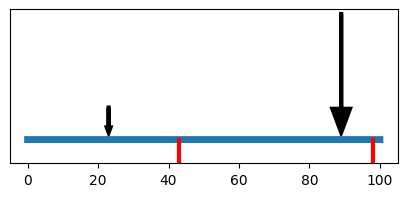

In [2]:
ui = tk.Tk()
ui.title("Análisis de vigas")
ui.geometry("1260x900")
sv_ttk.set_theme("dark")

vcmd = (ui.register(validate_numeric_input), '%d', '%P')

#grid

for i in range(0, 1260, 50):
    grid = ttk.Label(ui, text="|"+str(i), font=("Arial", 8))
    grid.place(x=i, y=0)

#Inputs

title1 = ttk.Label(ui, text="Introduzca datos de la viga", font=("Arial", 16))
title1.place(x=50, y=20)   

#Tamaño

title_tamaño = ttk.Label(ui, text="Tamaño de la viga (m)", font=("Arial", 12))
title_tamaño.place(x=10, y=60)  

tam = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd) 
tam.place(x=10, y=80)

tambutton = ttk.Button(ui, text="Aceptar", command=lambda: update_build(tam, valor_tamaño))
tambutton.place(x=100, y=80)

#Tipo

title_tipo = ttk.Label(ui, text="Tipo de viga", font=("Arial", 12))
title_tipo.place(x=10, y=120)

elegir_tipo = ttk.Combobox(ui, width=4, values=["Cantilever", "Apoyada"])
elegir_tipo.place(x=10, y=140)

tipobutton = ttk.Button(ui, text="Aceptar", command=lambda: update_disable(elegir_tipo, valor_tipo,elegir_tipo,apoyo1,apoyo2,apo1button,apo2button))
tipobutton.place(x=100, y=140)

#Apoyos

title_apoyos = ttk.Label(ui, text="Posición de los apoyos", font=("Arial", 12))
title_apoyos.place(x=10, y=180)

text_apoyo1 = ttk.Label(ui, text="Apoyo 1", font=("Arial", 10))
text_apoyo1.place(x=30, y=200)

apoyo1 = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
apoyo1.place(x=10, y=220)

apo1button = ttk.Button(ui, text="Aceptar", command=lambda: update_supports(apoyo1, valor_apoyo1,1))
apo1button.place(x=100, y=220)

text_apoyo2 = ttk.Label(ui, text="Apoyo 2", font=("Arial", 10))
text_apoyo2.place(x=30, y=260)

apoyo2 = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
apoyo2.place(x=10, y=280)

apo2button = ttk.Button(ui, text="Aceptar", command=lambda: update_supports(apoyo2, valor_apoyo2,2))
apo2button.place(x=100, y=280)

#Cargas puntuales

title_cargas = ttk.Label(ui, text="Cargas puntuales", font=("Arial", 12))
title_cargas.place(x=10, y=320)

text_poscarga = ttk.Label(ui, text="Posición (m)", font=("Arial", 10))
text_poscarga.place(x=30, y=340)

cargapuntualpos = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
cargapuntualpos.place(x=10, y=360)

text_magnitud = ttk.Label(ui, text="Magnitud (N)", font=("Arial", 10))
text_magnitud.place(x=115, y=340)

cargapuntualmag = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
cargapuntualmag.place(x=100, y=360)

tipobutton = ttk.Button(ui, text="Agregar", command=lambda: point_load(cargapuntualpos, cargapuntualmag))
tipobutton.place(x=190, y=360)

#Momentos puntuales

title_momentos = ttk.Label(ui, text="Momentos puntuales", font=("Arial", 12))
title_momentos.place(x=10, y=400)

text_posmomento = ttk.Label(ui, text="Posición (m)", font=("Arial", 10))
text_posmomento.place(x=30, y=420)

momentopos = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
momentopos.place(x=10, y=440)

text_magnitud = ttk.Label(ui, text="Magnitud (Nm)", font=("Arial", 10))
text_magnitud.place(x=115, y=420)

momentomag = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
momentomag.place(x=100, y=440)

tipobutton = ttk.Button(ui, text="Agregar", command=lambda: point_moment(momentopos, momentomag))
tipobutton.place(x=190, y=440)

#Calcular 

calcular = ttk.Button(ui, text="Calcular", command=lambda: calculate_beam(beamgraph,figbeam))
calcular.place(x=10, y=800)

#Datos

tamaño = ttk.Label(ui, text= "Longitud (m): ", font=("Arial", 12))
tamaño.place(x=500, y=40)

valor_tamaño = ttk.Label(ui, text= "", font=("Arial", 12))
valor_tamaño.place(x=600, y=40)

tipo = ttk.Label(ui, text= "Tipo de viga: ", font=("Arial", 12))
tipo.place(x=500, y=60)

valor_tipo = ttk.Label(ui, text= "", font=("Arial", 12))
valor_tipo.place(x=600, y=60)

pos_apoyo1 = ttk.Label(ui, text= "Apoyo 1: ", font=("Arial", 12))
pos_apoyo1.place(x=500, y=80)

valor_apoyo1 = ttk.Label(ui, text= "", font=("Arial", 12))
valor_apoyo1.place(x=600, y=80)

pos_apoyo2 = ttk.Label(ui, text= "Apoyo 2: ", font=("Arial", 12))
pos_apoyo2.place(x=500, y=100)

valor_apoyo2 = ttk.Label(ui, text= "", font=("Arial", 12))
valor_apoyo2.place(x=600, y=100)

#Gráficas

figbeam, ax = plt.subplots(figsize=(5, 2))

beamgraph = plot_widget(figbeam, master=ui)
beamgraph.get_tk_widget().place(x=700, y=20)


ui.mainloop()
